<a href="https://colab.research.google.com/github/NatFT/PythonCourse/blob/main/Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset 
---

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns

movies_data = (
    pd.read_csv("https://raw.githubusercontent.com/NatFT/PythonCourse/main/movies.csv")
    .assign(director = lambda df: df['first_name'] + " " + df['last_name'])
    .drop(['Unnamed: 0', 'first_name', 'last_name'], axis = 1)
              )
display(movies_data)
movies_data.info()
movies_data['genre'].unique()
movies_data['year'].unique()

,name,year,rank,genre,director
0,Rondo pour trompette,2002,NaN,Short,Les 12 Poissons
1,"Sleep of Cyma Roget, The",1920,NaN,Drama,Lejaren a'Hiller
2,Churches in Iraq,1988,NaN,Documentary,Khairiya A-Mansour
3,"Foto, La",2001,NaN,Drama,Ricardo A. Solla
4,"Foto, La",2001,NaN,Short,Ricardo A. Solla
...,...,...,...,...,...
368889,Kalbim agliyor,1988,NaN,Drama,Yusuf Ünal
368890,Ve gnese kan siradi,1972,NaN,Adventure,Ahmet Ündag
368891,"Liebenden vom Hotel von Osman, Die",2001,8.5,Short,Idil Üner
368892,Evvel zaman iinde,1951,NaN,Animation,Yüksel Ünsal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   name      368894 non-null  object 
 1   year      368894 non-null  int64  
 2   rank      113376 non-null  float64
 3   genre     368894 non-null  object 
 4   director  368894 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 14.1+ MB


array([2002, 1920, 1988, 2001, 1983, 1984, 1989, 1985, 1987, 1986, 1981,
       1990, 1993, 2003, 1953, 1933, 2004, 1996, 1999, 1992, 2000, 1978,
       1979, 1982, 1994, 1975, 1995, 1923, 1903, 1977, 1974, 1972, 1976,
       1970, 1962, 1991, 1969, 1980, 1952, 1965, 1968, 1967, 1960, 1961,
       1973, 1957, 1963, 1958, 1921, 1939, 1937, 1929, 1918, 1930, 1931,
       1940, 1966, 1997, 1964, 1955, 1956, 1998, 1926, 1954, 1950, 1971,
       1914, 1915, 1919, 1924, 1922, 1925, 1928, 1947, 1941, 1945, 1944,
       1946, 1948, 1949, 1951, 2006, 1959, 1916, 2005, 1938, 1899, 1901,
       1900, 1943, 1896, 1897, 1942, 1927, 1934, 1935, 1910, 1932, 1917,
       1908, 1909, 1907, 1936, 1906, 1905, 1911, 1913, 1912, 1898, 1904,
       1902, 1895, 1893, 1894, 2007, 1892, 1888])

### Clean the dataset 
---


In [96]:
movies_data = movies_data.sort_values('name', ignore_index = True) #.reset_index()
movies_data = movies_data.drop_duplicates(subset=['name', 'year','director'])
display(movies_data)

,name,year,rank,genre,director
0,Casablanca les anges ne volent pas,2004,NaN,Drama,Mohamed Asli
1,Clara,1994,NaN,Family,Diane Pierens
2,Flor da Pele,1976,5.5,Drama,Francisco Ramalho Jr.
3,Fogo na Roupa,1952,NaN,Comedy,Watson Macedo
4,Gaule,1974,NaN,Short,Pierre-Marie Goulet
...,...,...,...,...,...
231603,zenetek a Holdrl,1990,NaN,Short,András Szirtes
231604,zgrlgn bedeli,1977,NaN,Drama,Yusuf Kurçenli
231605,zleyis,1961,NaN,Drama,Aydin Arakon
231606,zmc kizin kaderi,1961,NaN,Romance,Kemal Kan


### How many movies of each genre are there?
---

In [3]:
count_genre = movies_data['genre'].value_counts()
print(count_genre)

Drama          52653
Short          46346
Comedy         34921
Documentary    27199
Animation       7555
Crime           7283
Action          7067
Romance         6883
Western         6458
Thriller        5874
Family          4682
Adventure       4481
Horror          4453
Musical         3635
Music           2641
Mystery         2504
Sci-Fi          2449
War             2373
Fantasy         1990
Film-Noir        161
Name: genre, dtype: int64


### Which director has the highest ranked movies?
---

In [97]:
movies_data

,name,year,rank,genre,director
0,Casablanca les anges ne volent pas,2004,NaN,Drama,Mohamed Asli
1,Clara,1994,NaN,Family,Diane Pierens
2,Flor da Pele,1976,5.5,Drama,Francisco Ramalho Jr.
3,Fogo na Roupa,1952,NaN,Comedy,Watson Macedo
4,Gaule,1974,NaN,Short,Pierre-Marie Goulet
...,...,...,...,...,...
231603,zenetek a Holdrl,1990,NaN,Short,András Szirtes
231604,zgrlgn bedeli,1977,NaN,Drama,Yusuf Kurçenli
231605,zleyis,1961,NaN,Drama,Aydin Arakon
231606,zmc kizin kaderi,1961,NaN,Romance,Kemal Kan


In [98]:
#Director with movies with the mean higest ranking
movies_data_no_na = movies_data.copy()[movies_data['rank'].notna()]
ranked_directors = movies_data_no_na[['director','rank']].groupby('director').mean()
# print(ranked_directors)
# max_mean_rank = ranked_directors['rank'].max()
# print(max_mean_rank)

max_rank = ranked_directors['rank'].max()
best_directors_mean = ranked_directors[ranked_directors['rank'] == max_rank]
print("Directors with movies with the higest mean ranking are:\n", best_directors_mean)

Directors with movies with the higest mean ranking are:
                     rank
director                
Andrew Cappelletti   9.9
Arünas Zebriünas     9.9
Debs Tarrier         9.9
Gregg Zehentner      9.9
Kirsten Tretbar      9.9
Matthew Crandall     9.9
Scott Barkan         9.9
Zack Resnicoff       9.9


### How many movies have ranks of over 9?
---


In [100]:
rank_over_9 = movies_data_no_na[movies_data_no_na['rank'] > 9]['name'].count()
print("There are", rank_over_9, "movies that rank over 9.")

There are 913 movies that rank over 9.


### Plot a bar chart of mean rank and genre
---

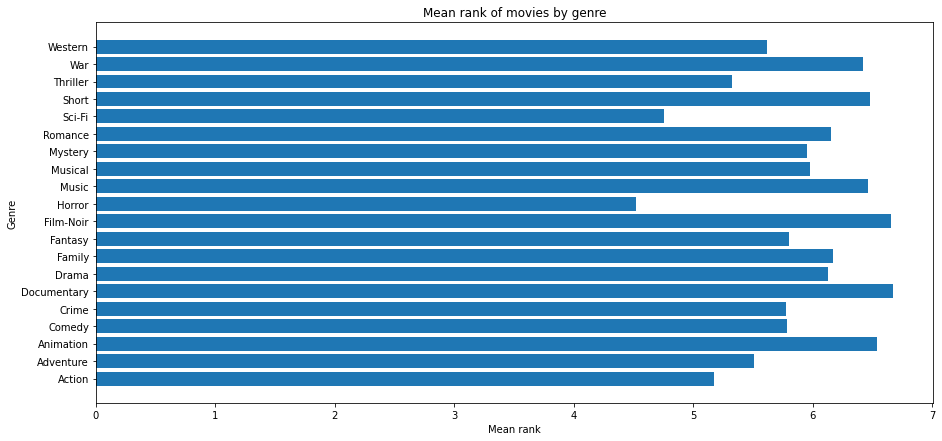

In [6]:
import matplotlib.pyplot as plt

mean_rank_by_genre = movies_data_no_na[['genre','rank']].groupby(['genre']).mean()

data = mean_rank_by_genre['rank']
labels = data.keys()
plt.figure(figsize =(15, 7))
plt.barh(labels, data)
plt.xlabel('Mean rank')
plt.ylabel('Genre')
plt.title('Mean rank of movies by genre')
plt.show()

### Plot a pie chart of how many movies of each genre there are 
---


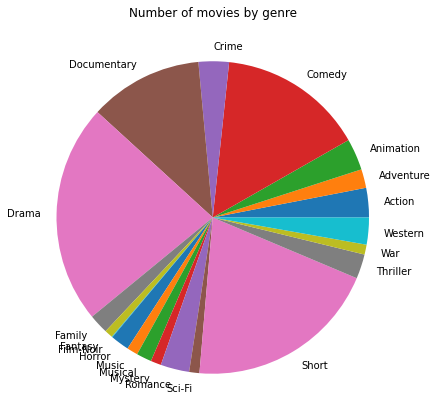

In [7]:
movies_by_genre = movies_data[['name', 'genre']].groupby(['genre']).count()
# display(movies_by_genre)

data = movies_by_genre['name']
labels = data.keys()
plt.figure(figsize =(7, 10))
plt.pie(data,labels = labels)
plt.title('Number of movies by genre')
plt.show()

### Plot a graph showing the mean Rank for each year 

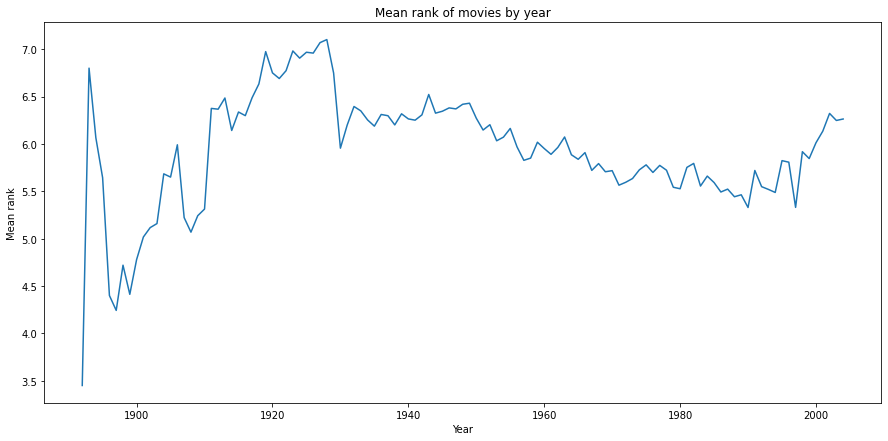

In [8]:
# display(movies_data_no_na)
year_mean_rank = movies_data_no_na[['year', 'rank']].groupby('year').mean()
# display(year_mean_rank)

data = year_mean_rank['rank']
labels = data.keys()
plt.figure(figsize =(15, 7))
plt.plot(labels, data)
plt.xlabel('Year')
plt.ylabel('Mean rank')
plt.title('Mean rank of movies by year')
plt.show()


### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1.  Plot of how many movies made each year 
2.  Who is the highest ranking comedy director
3.  In each decade, which genre ranked highest

### Complete the tasks you have set out in the exercise above. 
---


Movies made each year:


*   Total
*   By genre



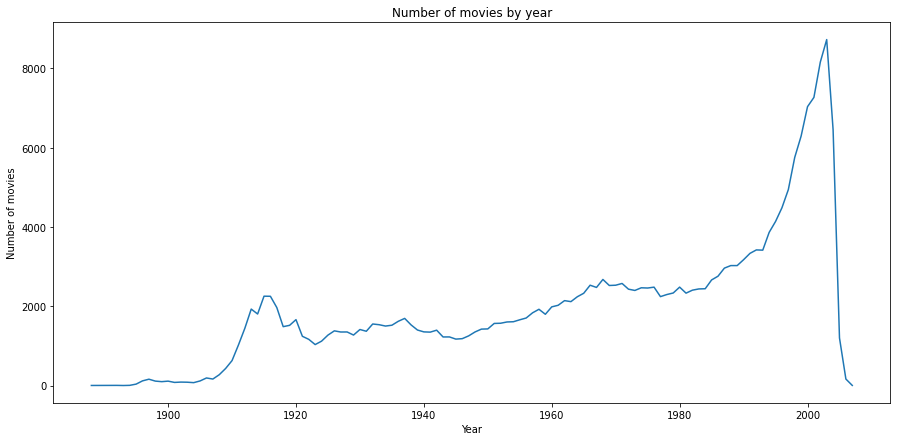

In [9]:
count_movies = movies_data[['name','year']].groupby('year').count()
data = count_movies['name']
labels = data.keys()
plt.figure(figsize =(15, 7))
plt.plot(labels, data)
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of movies by year')
plt.show()

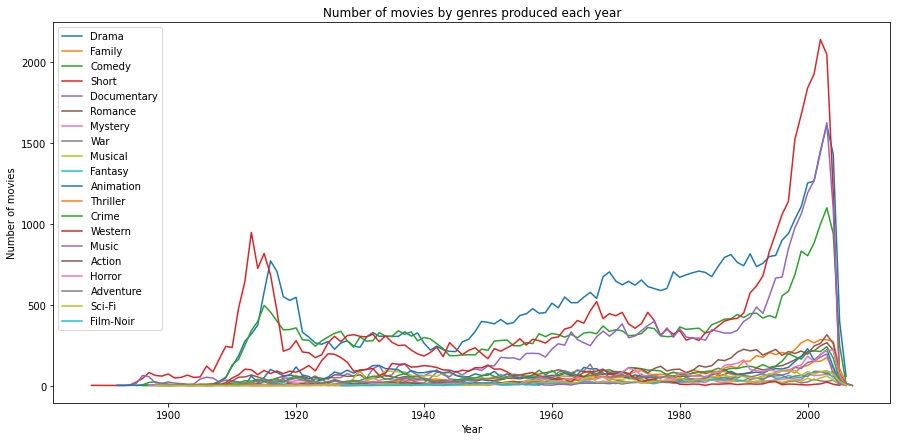

In [10]:
# display(movies_data)

# count_movies_yr_gen = movies_data[['name','year','genre']].groupby(['year', 'genre']).count()
# display(count_movies_yr_gen)

plt.figure(figsize =(15, 7))
genres = movies_data['genre'].unique()
for genre in genres:
  genres_count = movies_data[movies_data['genre'] == genre]
  count_movies = genres_count[['name','year']].groupby('year').count()
  data = count_movies['name']
  plt.plot(data,label = str(genre))
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of movies by genres produced each year')
plt.show()

In [101]:
ranked_directors = movies_data_no_na[['director','rank']].groupby('director').mean()
# print(ranked_directors)
# max_mean_rank = ranked_directors['rank'].max()
# print(max_mean_rank)

max_rank = ranked_directors['rank'].max()
best_directors_mean = ranked_directors[ranked_directors['rank'] == max_rank]
print("Directors with movies with the higest mean ranking are:\n", best_directors_mean)

Directors with movies with the higest mean ranking are:
                     rank
director                
Andrew Cappelletti   9.9
Arünas Zebriünas     9.9
Debs Tarrier         9.9
Gregg Zehentner      9.9
Kirsten Tretbar      9.9
Matthew Crandall     9.9
Scott Barkan         9.9
Zack Resnicoff       9.9


Best comedy director

In [153]:
comedies = movies_data_no_na[movies_data_no_na['genre'] == 'Comedy']
ranked_comedy_directors = comedies[['director','rank']].groupby('director').mean()
max_rank = ranked_comedy_directors['rank'].max()
best_comedy_directors_mean = ranked_comedy_directors[ranked_comedy_directors['rank'] == max_rank]
# print("Directors with comedy movies with the higest mean ranking are:\n", best_comedy_directors_mean)

for director, rank in best_comedy_directors_mean.itertuples():
  print(director)


Andrew Cappelletti
Isidor Annensky
Ivanka Grybcheva


Highest ranking genre per decade

In [107]:
id(movies_data)
test = movies_data
id(movies_data) == id(test)
id(movies_data) == id(movies_data_no_na)

False

In [159]:
movies_data_no_na['decade'] = (movies_data_no_na['year'] // 10) * 10
movies_data_no_na = movies_data_no_na.sort_values(by = 'year')

dec_group = movies_data_no_na[['decade', 'genre', 'rank']].groupby(['decade','genre'], as_index=False).mean()
idx = dec_group.groupby(['decade'])['rank'].transform(max) == dec_group['rank']
display(dec_group[idx])

,decade,genre,rank
6,1890,Sci-Fi,6.400000
18,1900,Sci-Fi,8.200000
35,1910,Thriller,8.300000
56,1920,War,7.850000
63,1930,Documentary,6.626316
87,1940,Film-Noir,6.969737
100,1950,Animation,6.730180
123,1960,Documentary,6.658416
139,1970,Animation,6.730097
158,1980,Animation,6.751282


In [154]:
#This method works but does not fully utilise pandas

movies_data_no_na['decade'] = (movies_data_no_na['year'] // 10) * 10
movies_data_no_na = movies_data_no_na.sort_values(by = 'year')

for decade in movies_data_no_na['decade'].unique():
  dec_df = movies_data_no_na[movies_data_no_na['decade'] == decade]
  df_pivot = pd.pivot_table(dec_df, values = 'rank', index = 'genre', aggfunc = np.mean)
  max_rank = df_pivot['rank'].max()
  max_genre = df_pivot[df_pivot['rank'] == max_rank]
  print(decade, max_genre.index[0], end='\n', sep=' ')

1890 Sci-Fi
1900 Sci-Fi
1910 Thriller
1920 War
1930 Documentary
1940 Film-Noir
1950 Animation
1960 Documentary
1970 Animation
1980 Animation
1990 Music
2000 Documentary


# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

## What caused you the most difficulty?

Your answer: